In [80]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [108]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


In [109]:
K_range = range(1, 11)  # Checking for clusters from 1 to 10


In [110]:
inertia = []  # List to store within-cluster sum of squares


In [111]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)


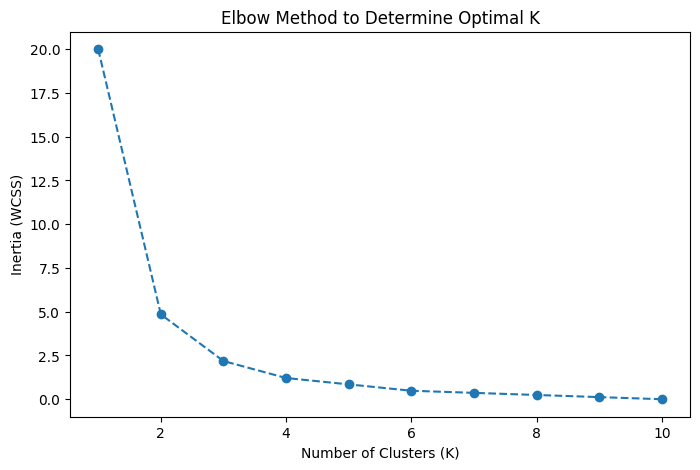

In [112]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method to Determine Optimal K")
plt.show()


In [ ]:

from sklearn.metrics import silhouette_score, davies_bouldin_score

best_k = 3  # Assuming 3 is the optimal cluster count from Elbow method
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(data_scaled_df)

silhouette_kmeans = silhouette_score(data_scaled_df, labels_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(data_scaled_df, labels_kmeans)

print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Davies-Bouldin Score (K-Means): {davies_bouldin_kmeans}")


In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage

linkage_method = 'ward'  # Can be 'single', 'complete', 'average', 'ward'
linked = linkage(data_scaled_df, method=linkage_method)

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title(f"Dendrogram ({linkage_method} linkage)")
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=best_k, linkage=linkage_method)
labels_hierarchical = hierarchical.fit_predict(data_scaled_df)

silhouette_hierarchical = silhouette_score(data_scaled_df, labels_hierarchical)
davies_bouldin_hierarchical = davies_bouldin_score(data_scaled_df, labels_hierarchical)

print(f"Silhouette Score (Hierarchical): {silhouette_hierarchical}")
print(f"Davies-Bouldin Score (Hierarchical): {davies_bouldin_hierarchical}")


In [ ]:

eps_value = 0.5  # Can be adjusted based on dataset
min_samples_value = 5

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels_dbscan = dbscan.fit_predict(data_scaled_df)

# Only compute silhouette score if there is more than one cluster
if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(data_scaled_df, labels_dbscan)
    davies_bouldin_dbscan = davies_bouldin_score(data_scaled_df, labels_dbscan)
    print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
    print(f"Davies-Bouldin Score (DBSCAN): {davies_bouldin_dbscan}")
else:
    print("DBSCAN did not form distinct clusters.")


In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled_df.iloc[:, 0], y=data_scaled_df.iloc[:, 1], hue=labels_kmeans, palette="viridis", alpha=0.7)
plt.title("Cluster Visualization (K-Means)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled_df.iloc[:, 0], y=data_scaled_df.iloc[:, 1], hue=labels_hierarchical, palette="coolwarm", alpha=0.7)
plt.title("Cluster Visualization (Hierarchical)")
plt.show()
